# Movie Review Sentiment Analysis

Let's use five different deep learning models to perform sentiment analysis on one dataset, the IMDB dataset. The Internet Movie Database (IMDB) dataset consists 50,000 movie reviews, half of which are good reviews, the other half bad. As it is already preloaded in Keras, loading and using it is very easy. 

In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


To leave out the rare words, we will only use the top 10,000 most frequent words. 

In [2]:
(training_input, training_label), (test_input, test_label) = imdb.load_data(num_words=10000)

In [3]:
print("The size of training data is {} training inputs plus {} corresponding training labels, while".format
      (len(training_input),len(training_label)))

print("the size of training data is {} test inputs plus {} corresponding test labels.".format
      (len(test_input),len(test_label)))

The size of training data is 25000 training inputs plus 25000 corresponding training labels, while
the size of training data is 25000 test inputs plus 25000 corresponding test labels.


In [4]:
example_1 = list(training_input[0])[:15]

print("Let's examine the 1st training input. We'll print its first 15 elements here: {}".format
      (example_1))

print("Since we set numwords = 10000, the highest index is {}".format
      (max([max(i) for i in training_input])))

Let's examine the 1st training input. We'll print its first 15 elements here: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4]
Since we set numwords = 10000, the highest index is 9999


The dictionary mapping from word to index is built-in as well.

In [5]:
word2index = imdb.get_word_index()
list(word2index .items())[:10]

[('fawn', 34701),
 ('tsukino', 52006),
 ('nunnery', 52007),
 ('sonja', 16816),
 ('vani', 63951),
 ('woods', 1408),
 ('spiders', 16115),
 ('hanging', 2345),
 ('woody', 2289),
 ('trawling', 52008)]

We'll have to create the reverse dictonary which maps from index to word.

In [6]:
index2word = {j:i for i,j in word2index.items()}
list(index2word.items())[:10]

[(34701, 'fawn'),
 (52006, 'tsukino'),
 (52007, 'nunnery'),
 (16816, 'sonja'),
 (63951, 'vani'),
 (1408, 'woods'),
 (16115, 'spiders'),
 (2345, 'hanging'),
 (2289, 'woody'),
 (52008, 'trawling')]

We can use it to convert the first training input from numbers to words.

In [7]:
" ".join([index2word.get(i-3, "?") for i in training_input[0]])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## 1) Dense Network

The first model will be dense network with 2 hidden layers and one Dense output layer. The function vectorize_sentence will convert the training and test inputs into binary matrix, so that it can be fed into the network. There is no need to transform the labels.

In [8]:
import numpy as np

def vectorize_sentence(sequences, dimension = 10000):
    result = np.zeros((len(sequences), dimension))
    for i, j in enumerate(sequences):
        result[i,j] = 1
    return result

training_input_binary_index = vectorize_sentence(training_input)
test_input_binary_index = vectorize_sentence(test_input)

In [9]:
print('The shape of training input will become {}. \
As illustration, the first training example will be transformed from {} to \
{}'.format(training_input_binary_index.shape, example_1, training_input_binary_index[0]))

The shape of training input will become (25000, 10000). As illustration, the first training example will be transformed from [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4] to [0. 1. 1. ... 0. 0. 0.]


Below is our model 1.

In [81]:
from keras.models import Sequential
from keras.layers import Dense

model1 = Sequential()
model1.add(Dense(16, activation= "relu", input_shape = (10000, )))
model1.add(Dense(16, activation = "relu"))
model1.add(Dense(1, activation = "sigmoid"))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_37 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [82]:
model1.compile(optimizer = "rmsprop",
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

In [83]:
history1 = model1.fit(training_input_binary_index, 
                    training_label, 
                    epochs = 20, 
                    batch_size = 512, 
                    validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 2s 80us/step - loss: 0.4798 - acc: 0.8076 - val_loss: 0.3594 - val_acc: 0.8698
Epoch 2/20
20000/20000 [==============================] - 1s 44us/step - loss: 0.2711 - acc: 0.9059 - val_loss: 0.2802 - val_acc: 0.8920
Epoch 3/20
20000/20000 [==============================] - 1s 50us/step - loss: 0.2021 - acc: 0.9307 - val_loss: 0.2844 - val_acc: 0.8860
Epoch 4/20
20000/20000 [==============================] - 1s 51us/step - loss: 0.1657 - acc: 0.9428 - val_loss: 0.3254 - val_acc: 0.8756
Epoch 5/20
20000/20000 [==============================] - 1s 48us/step - loss: 0.1401 - acc: 0.9515 - val_loss: 0.3275 - val_acc: 0.8792
Epoch 6/20
20000/20000 [==============================] - 1s 46us/step - loss: 0.1189 - acc: 0.9605 - val_loss: 0.3129 - val_acc: 0.8876
Epoch 7/20
20000/20000 [==============================] - 1s 46us/step - loss: 0.1046 - acc: 0.9652 - val_loss: 0.3399 - val_acc:

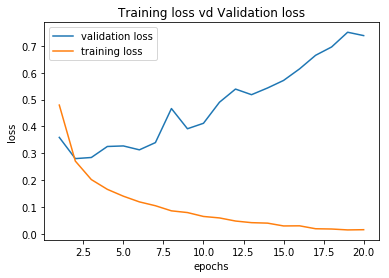

In [84]:
import matplotlib.pyplot as plt
val_loss = history1.history['val_loss']
loss = history1.history['loss']
epochs = range(1, len(val_loss)+1)
plt.plot(epochs, val_loss, label = "validation loss")
plt.plot(epochs, loss, label = 'training loss')
plt.title("Training loss vd Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

Above, we can see that Model 1 started to overfit pretty early from around epoch 4 onwards.

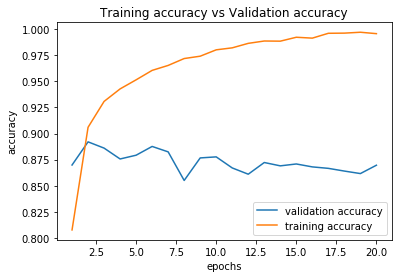

In [85]:
val_acc = history1.history["val_acc"]
acc = history1.history["acc"]
plt.plot(epochs, val_acc, label = "validation accuracy")
plt.plot(epochs, acc, label = "training accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Training accuracy vs Validation accuracy")
plt.legend()

However, it has stable and high accuracy at around 88%.  
  
We'll start over and retrain Model 1 for 4 epochs. 

In [15]:
model1 = Sequential()
model1.add(Dense(16, activation= "relu", input_shape = (10000, )))
model1.add(Dense(16, activation = "relu"))
model1.add(Dense(1, activation = "sigmoid"))

model1.compile(optimizer = "rmsprop",
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

history1 = model1.fit(training_input_binary_index, 
                    training_label, 
                    epochs = 4, 
                    batch_size = 512, 
                    validation_split = 0.2)


Train on 20000 samples, validate on 5000 samples
Epoch 1/4
20000/20000 [==============================] - 1s 65us/step - loss: 0.4571 - acc: 0.8140 - val_loss: 0.3782 - val_acc: 0.8454
Epoch 2/4
20000/20000 [==============================] - 1s 60us/step - loss: 0.2690 - acc: 0.9085 - val_loss: 0.2978 - val_acc: 0.8832
Epoch 3/4
20000/20000 [==============================] - 1s 59us/step - loss: 0.2010 - acc: 0.9304 - val_loss: 0.2739 - val_acc: 0.8904
Epoch 4/4
20000/20000 [==============================] - 1s 59us/step - loss: 0.1651 - acc: 0.9434 - val_loss: 0.2962 - val_acc: 0.8854


Evaluating Model 1 on the test data, we have the following loss nad accuracy.

In [16]:
pred1 = model1.evaluate(test_input_binary_index, test_label)
print(model1.metrics_names,"\n",pred1)

25000/25000 [==============================] - 4s 174us/step
['loss', 'acc'] 
 [0.3059504289722443, 0.87804]


## 2) Using an embedding layer

For Model 2, we will use an Embedding layer instead. The word embeddings will be trained together with the network. It will need to be flattened before it is fed to the output layer.

In [17]:
from keras.layers import Embedding, Flatten, Dense
from keras.models import Sequential

Since the training inputs are of different length, we will need to truncate the longer ones and pad the shorter ones so that the entire set has length of 1000. The 10th training input is printed below.

In [18]:
from keras.preprocessing.sequence import pad_sequences
maxlength = 500

training_input_padded = pad_sequences(training_input, maxlen = maxlength)
test_input_padded = pad_sequences(test_input, maxlen = maxlength)

In [19]:
training_input_padded[10]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    1,  785,  189,  438,   47,
        110,  142,    7,    6, 7475,  120,    4,  236,  378,    7,  153,
         19,   87,  108,  141,   17, 1004,    5,    2,  883,    2,   23,
          8,    4,  136,    2,    2,    4, 7475,   43, 1076,   21, 1407,
        419,    5, 5202,  120,   91,  682,  189, 2818,    5,    9, 1348,
         31,    7,    4,  118,  785,  189,  108,  126,   93,    2,   16,
        540,  324,   23,    6,  364,  352,   21,   14,    9,   93,   56,
         18,   11,  230,   53,  771,   74,   31,   34,    4, 2834,    7,
          4,   22,    5,   14,   11,  471,    9,    2,   34,    4,  321,
        487,    5,  116,   15, 6584,    4,   22,   

Next we specify the architecture for Model 2.

In [20]:
model2 = Sequential()
model2.add(Embedding(10000,8,input_length = maxlength, name = 'embed'))
model2.add(Flatten())
model2.add(Dense(1, activation = 'sigmoid'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embed (Embedding)            (None, 500, 8)            80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 4000)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 4001      
Total params: 84,001
Trainable params: 84,001
Non-trainable params: 0
_________________________________________________________________


In [21]:
model2.compile(optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

In [22]:
history2 = model2.fit(training_input_padded, training_label,
                     epochs = 20,
                     batch_size = 512,
                     validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 0s 16us/step - loss: 0.6897 - acc: 0.5445 - val_loss: 0.6846 - val_acc: 0.4978
Epoch 2/20
20000/20000 [==============================] - 0s 10us/step - loss: 0.6493 - acc: 0.7016 - val_loss: 0.6146 - val_acc: 0.7212
Epoch 3/20
20000/20000 [==============================] - 0s 10us/step - loss: 0.5557 - acc: 0.7949 - val_loss: 0.5112 - val_acc: 0.8022
Epoch 4/20
20000/20000 [==============================] - 0s 11us/step - loss: 0.4516 - acc: 0.8478 - val_loss: 0.4252 - val_acc: 0.8432
Epoch 5/20
20000/20000 [==============================] - 0s 10us/step - loss: 0.3678 - acc: 0.8778 - val_loss: 0.3793 - val_acc: 0.8512
Epoch 6/20
20000/20000 [==============================] - 0s 10us/step - loss: 0.3114 - acc: 0.8927 - val_loss: 0.3504 - val_acc: 0.8518
Epoch 7/20
20000/20000 [==============================] - 0s 10us/step - loss: 0.2714 - acc: 0.9059 - val_loss: 0.3328 - val_acc:

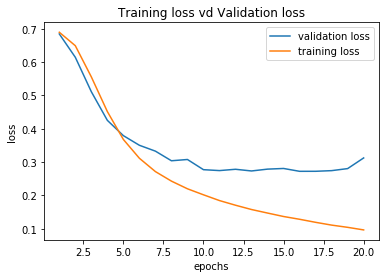

In [23]:
val_loss = history2.history['val_loss']
loss = history2.history['loss']
epochs = range(1, len(val_loss)+1)
plt.plot(epochs, val_loss, label = "validation loss")
plt.plot(epochs, loss, label = 'training loss')
plt.title("Training loss vd Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

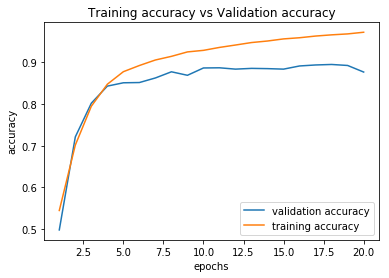

In [24]:
val_acc = history2.history["val_acc"]
acc = history2.history["acc"]
plt.plot(epochs, val_acc, label = "validation accuracy")
plt.plot(epochs, acc, label = "training accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Training accuracy vs Validation accuracy")
plt.legend()

Overfitting appears to occur around the 10th epoch. We'll retrained Model 2 to the 10th epoch.

In [25]:
model2 = Sequential()
model2.add(Embedding(10000,8,input_length = maxlength, name = 'embed'))
model2.add(Flatten())
model2.add(Dense(1, activation = 'sigmoid'))

model2.compile(optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

history2 = model2.fit(training_input_padded, training_label,
                     epochs = 10,
                     batch_size = 512,
                     validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 0s 16us/step - loss: 0.6907 - acc: 0.5311 - val_loss: 0.6831 - val_acc: 0.5444
Epoch 2/10
20000/20000 [==============================] - 0s 10us/step - loss: 0.6509 - acc: 0.7076 - val_loss: 0.6144 - val_acc: 0.7370
Epoch 3/10
20000/20000 [==============================] - 0s 10us/step - loss: 0.5547 - acc: 0.7948 - val_loss: 0.5130 - val_acc: 0.8002
Epoch 4/10
20000/20000 [==============================] - 0s 10us/step - loss: 0.4496 - acc: 0.8473 - val_loss: 0.4255 - val_acc: 0.8386
Epoch 5/10
20000/20000 [==============================] - 0s 10us/step - loss: 0.3675 - acc: 0.8764 - val_loss: 0.3776 - val_acc: 0.8502
Epoch 6/10
20000/20000 [==============================] - 0s 10us/step - loss: 0.3118 - acc: 0.8912 - val_loss: 0.3451 - val_acc: 0.8592
Epoch 7/10
20000/20000 [==============================] - 0s 10us/step - loss: 0.2738 - acc: 0.9041 - val_loss: 0.3213 - val_acc:

Let's evaluate Model 2 on the test data.

In [26]:
pred2 = model2.evaluate(test_input_padded, test_label)
print(model2.metrics_names,"\n",pred2)

25000/25000 [==============================] - 0s 15us/step
['loss', 'acc'] 
 [0.28472590630531314, 0.88388]


## 3) Using a pretrained word embedding layer using GloVe

The third model will use pretrained word embeddings [GloVe](https://nlp.stanford.edu/projects/glove/). Download glove.6B.100d.txt into the directory and open it.

In [27]:
with open('./glove.6B.100d.txt') as f:
    glove = {}
    for line in f:
        line = line.split()
        word = line[0]
        embeddings = np.asarray(line[1:], dtype = 'float32')
        glove[word] = embeddings  
      

Each of the 400,000 words in GloVe is represented by a 100D vector. We'll take a look at the first two words, 'the' and 'if'.

In [28]:
list(glove.items())[:2]

[('the',
  array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
         -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
          0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
         -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
          0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
         -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
          0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
          0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
         -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
         -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
         -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
         -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
         -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
         -1.2526

Next, we'll join every word in the dictionary word2index with its counterpart in GloVe. Since our dictionary has 10,000 words, and every word is now represented by a 100D vector, we will now have a 10000 by 100 matrix.

In [29]:
embedding_matrix = np.zeros((10000,100))
for word,index in word2index.items():
    if index < 10000:
        embedding_vector = glove.get(word,None)
        if embedding_vector is not None:
            embedding_matrix[index,:]= embedding_vector

Model 3 will first have a embedding layer in which the weights will be set using embedding matrix i.e. the GloVe embeddings. It will be flatten and fed into a dense layer, then finally the output layer.

In [30]:
model3 = Sequential()
model3.add(Embedding(10000,100, input_length = maxlength))
model3.add(Flatten())
model3.add(Dense(32, activation = 'relu'))
model3.add(Dense(1, activation = "sigmoid"))
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 50000)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                1600032   
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 2,600,065
Trainable params: 2,600,065
Non-trainable params: 0
_________________________________________________________________


Here we set the weights but specify that we shall not train them.

In [31]:
model3.layers[0].set_weights([embedding_matrix])
model3.layers[0].trainable = False

In [32]:
model3.compile(optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

We shall use the padded inputs "training_input_padded" from Model 2 to train it and "test_input_padded' to test it.

In [33]:
history3 = model3.fit(training_input_padded,
                     training_label,
                     epochs = 20,
                     batch_size = 512,
                     validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 3s 145us/step - loss: 1.1124 - acc: 0.5020 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 2/20
20000/20000 [==============================] - 3s 135us/step - loss: 0.6931 - acc: 0.5016 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 3/20
20000/20000 [==============================] - 3s 139us/step - loss: 0.6938 - acc: 0.5031 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 4/20
20000/20000 [==============================] - 3s 139us/step - loss: 0.6931 - acc: 0.5016 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 5/20
20000/20000 [==============================] - 3s 142us/step - loss: 0.6931 - acc: 0.5016 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 6/20
20000/20000 [==============================] - 3s 141us/step - loss: 0.6931 - acc: 0.5016 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 7/20
20000/20000 [==============================] - 3s 142us/step - loss: 0.6931 - acc: 0.5016 - val_loss: 0.6932 - v

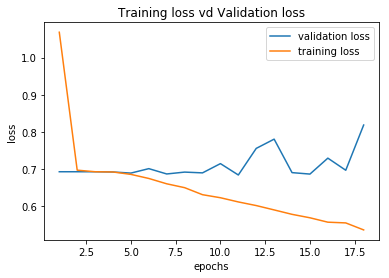

In [74]:
val_loss = history3.history['val_loss']
loss = history3.history['loss']
epochs = range(1, len(val_loss)+1)
plt.plot(epochs, val_loss, label = "validation loss")
plt.plot(epochs, loss, label = 'training loss')
plt.title("Training loss vd Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

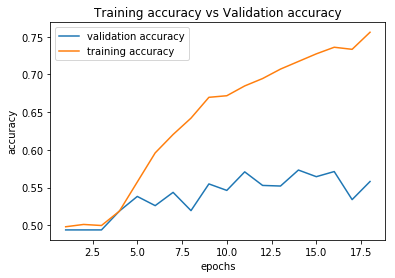

In [75]:
val_acc = history3.history["val_acc"]
acc = history3.history["acc"]
plt.plot(epochs, val_acc, label = "validation accuracy")
plt.plot(epochs, acc, label = "training accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Training accuracy vs Validation accuracy")
plt.legend()

Both accuracy and loss appear to be volatile, and the best choice seems to be retraining Model 3 to around 18 epochs.

In [36]:
model3 = Sequential()
model3.add(Embedding(10000,100, input_length = maxlength))
model3.add(Flatten())
model3.add(Dense(32, activation = 'relu'))
model3.add(Dense(1, activation = "sigmoid"))

model3.layers[0].set_weights([embedding_matrix])
model3.layers[0].trainable = False

model3.compile(optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])


history3 = model3.fit(training_input_padded,
                     training_label,
                     epochs = 18,
                     batch_size = 512,
                     validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/18
20000/20000 [==============================] - 3s 154us/step - loss: 1.0681 - acc: 0.4980 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 2/18
20000/20000 [==============================] - 3s 145us/step - loss: 0.6974 - acc: 0.5010 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 3/18
20000/20000 [==============================] - 3s 141us/step - loss: 0.6932 - acc: 0.4996 - val_loss: 0.6932 - val_acc: 0.4938
Epoch 4/18
20000/20000 [==============================] - 3s 139us/step - loss: 0.6926 - acc: 0.5186 - val_loss: 0.6925 - val_acc: 0.5188
Epoch 5/18
20000/20000 [==============================] - 3s 138us/step - loss: 0.6861 - acc: 0.5574 - val_loss: 0.6896 - val_acc: 0.5382
Epoch 6/18
20000/20000 [==============================] - 3s 139us/step - loss: 0.6751 - acc: 0.5959 - val_loss: 0.7015 - val_acc: 0.5260
Epoch 7/18
20000/20000 [==============================] - 3s 136us/step - loss: 0.6608 - acc: 0.6203 - val_loss: 0.6872 - v

Let's evaluate Model 3 on the test data.

In [37]:
pred3 = model3.evaluate(test_input_padded, test_label)
print(model3.metrics_names,"\n",pred3)

25000/25000 [==============================] - 6s 253us/step
['loss', 'acc'] 
 [0.8222982657623291, 0.55028]


With a dismal accuracy of around 53%, it appears that the GloVe embeddings might be to generic for the purpose of classifying movie reviews. Although very useful when there is not enough training data, pretrained word embeddings are trained for generic context, and sometimes do not fit specific, narrow objectives very well, in this case reviewing movies. 

## 4) Recurrent Network RNN

Let's see if the order sequence of how the words in the review appear will help in classifying the movie reviews. Model 4 will be employ an untrained embedding layer followed by a simple RNN, and lastly the output layer. The same padded inputs used in Model 2 and 3 shall be fed into this model.

In [38]:
from keras.layers import SimpleRNN

In [39]:
model4 = Sequential()
model4.add(Embedding(10000, 32, input_length = maxlength))
model4.add(SimpleRNN(32))
model4.add(Dense(1, activation = 'sigmoid'))

In [40]:
model4.compile(optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = ['acc']
              )

In [41]:
history4 = model4.fit(training_input_padded,
                     training_label,
                     epochs = 15,
                     batch_size = 512,
                     validation_split = 0.2                   
                    )

Train on 20000 samples, validate on 5000 samples
Epoch 1/15
20000/20000 [==============================] - 8s 391us/step - loss: 0.6881 - acc: 0.5414 - val_loss: 0.6793 - val_acc: 0.5650
Epoch 2/15
20000/20000 [==============================] - 8s 383us/step - loss: 0.5895 - acc: 0.7251 - val_loss: 0.5721 - val_acc: 0.7194
Epoch 3/15
20000/20000 [==============================] - 8s 383us/step - loss: 0.4317 - acc: 0.8275 - val_loss: 0.5439 - val_acc: 0.7242
Epoch 4/15
20000/20000 [==============================] - 8s 380us/step - loss: 0.3311 - acc: 0.8697 - val_loss: 0.3827 - val_acc: 0.8408
Epoch 5/15
20000/20000 [==============================] - 8s 384us/step - loss: 0.2573 - acc: 0.9068 - val_loss: 0.4232 - val_acc: 0.8270
Epoch 6/15
20000/20000 [==============================] - 8s 382us/step - loss: 0.2237 - acc: 0.9198 - val_loss: 0.4128 - val_acc: 0.8298
Epoch 7/15
20000/20000 [==============================] - 8s 384us/step - loss: 0.1855 - acc: 0.9350 - val_loss: 0.4465 - v

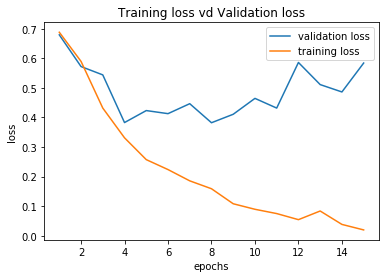

In [42]:
val_loss = history4.history['val_loss']
loss = history4.history['loss']
epochs = range(1, len(val_loss)+1)
plt.plot(epochs, val_loss, label = "validation loss")
plt.plot(epochs, loss, label = 'training loss')
plt.title("Training loss vd Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

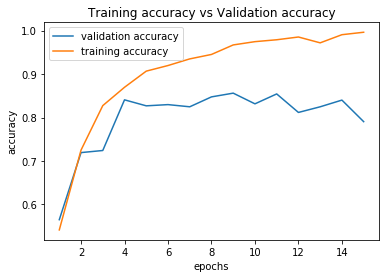

In [43]:
val_acc = history4.history["val_acc"]
acc = history4.history["acc"]
plt.plot(epochs, val_acc, label = "validation accuracy")
plt.plot(epochs, acc, label = "training accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Training accuracy vs Validation accuracy")
plt.legend()

We get the best loss and accuracy pair around the 8th epoch, so Model 4 shall be retrained for 8 epochs.

In [44]:
model4 = Sequential()
model4.add(Embedding(10000, 32, input_length = maxlength))
model4.add(SimpleRNN(32))
model4.add(Dense(1, activation = 'sigmoid'))

model4.compile(optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = ['acc']
              )

history4 = model4.fit(training_input_padded,
                     training_label,
                     epochs = 8,
                     batch_size = 512,
                     validation_split = 0.2                   
                    )

Train on 20000 samples, validate on 5000 samples
Epoch 1/8
20000/20000 [==============================] - 8s 401us/step - loss: 0.6825 - acc: 0.5562 - val_loss: 0.6479 - val_acc: 0.6662
Epoch 2/8
20000/20000 [==============================] - 8s 386us/step - loss: 0.5597 - acc: 0.7582 - val_loss: 0.5235 - val_acc: 0.7636
Epoch 3/8
20000/20000 [==============================] - 8s 376us/step - loss: 0.4587 - acc: 0.8054 - val_loss: 0.4640 - val_acc: 0.8008
Epoch 4/8
20000/20000 [==============================] - 8s 380us/step - loss: 0.3542 - acc: 0.8672 - val_loss: 0.4986 - val_acc: 0.7622
Epoch 5/8
20000/20000 [==============================] - 8s 376us/step - loss: 0.3041 - acc: 0.8876 - val_loss: 0.4046 - val_acc: 0.8338
Epoch 6/8
20000/20000 [==============================] - 7s 374us/step - loss: 0.2431 - acc: 0.9127 - val_loss: 0.4502 - val_acc: 0.8112
Epoch 7/8
20000/20000 [==============================] - 7s 373us/step - loss: 0.1853 - acc: 0.9389 - val_loss: 0.4022 - val_acc:

Let's evaluate Model 4 on the test data.

In [45]:
pred4 = model4.evaluate(test_input_padded, test_label)
print(model4.metrics_names,"\n",pred4)

25000/25000 [==============================] - 9s 368us/step
['loss', 'acc'] 
 [0.5083764553546906, 0.77108]


Not a lot of improvements despite the added complexity and longer training time. RNN appears to be unable to remember long sequences as it is often being plagued by the vanishing gradient problem. Let's employ a more sophisticated model next, one that is able to capture longer term dependancies using LSTM.

## 5) LSTM

Let's see if using Long-Short Term Memory LSTM model will help. Model 5 is just like model 4, except we replaced the SimpleRNN layer with a LSTM layer.

In [46]:
from keras.layers import LSTM

In [47]:
model5 = Sequential()
model5.add(Embedding(10000, 32, input_length = maxlength))
model5.add(LSTM(32))
model5.add(Dense(1, activation = 'sigmoid'))

In [48]:
model5.compile(optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = ['acc']
              )

In [49]:
history5 = model5.fit(training_input_padded,
                     training_label,
                     epochs = 15,
                     batch_size = 512,
                     validation_split = 0.2                   
                    )

Train on 20000 samples, validate on 5000 samples
Epoch 1/15
20000/20000 [==============================] - 16s 814us/step - loss: 0.6503 - acc: 0.6613 - val_loss: 0.6058 - val_acc: 0.6830
Epoch 2/15
20000/20000 [==============================] - 16s 777us/step - loss: 0.4756 - acc: 0.8127 - val_loss: 0.4386 - val_acc: 0.8416
Epoch 3/15
20000/20000 [==============================] - 15s 755us/step - loss: 0.3558 - acc: 0.8691 - val_loss: 0.3955 - val_acc: 0.8320
Epoch 4/15
20000/20000 [==============================] - 15s 758us/step - loss: 0.2898 - acc: 0.8940 - val_loss: 0.3719 - val_acc: 0.8498
Epoch 5/15
20000/20000 [==============================] - 15s 760us/step - loss: 0.2439 - acc: 0.9119 - val_loss: 0.3233 - val_acc: 0.8690
Epoch 6/15
20000/20000 [==============================] - 15s 758us/step - loss: 0.2178 - acc: 0.9191 - val_loss: 0.3148 - val_acc: 0.8648
Epoch 7/15
20000/20000 [==============================] - 16s 794us/step - loss: 0.1893 - acc: 0.9319 - val_loss: 0.4

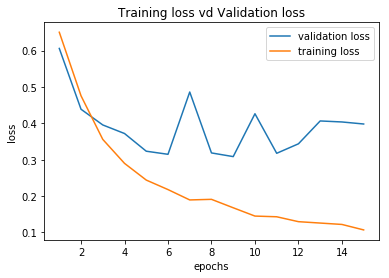

In [50]:
val_loss = history5.history['val_loss']
loss = history5.history['loss']
epochs = range(1, len(val_loss)+1)
plt.plot(epochs, val_loss, label = "validation loss")
plt.plot(epochs, loss, label = 'training loss')
plt.title("Training loss vd Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

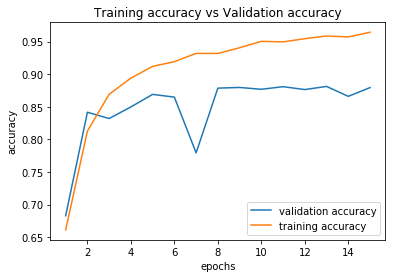

In [51]:
val_acc = history5.history["val_acc"]
acc = history5.history["acc"]
plt.plot(epochs, val_acc, label = "validation accuracy")
plt.plot(epochs, acc, label = "training accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Training accuracy vs Validation accuracy")
plt.legend()

Very volatile accuracy and loss. We shall retrain Model 5 till the 7th epoch.

In [52]:
model5 = Sequential()
model5.add(Embedding(10000, 32, input_length = maxlength))
model5.add(LSTM(32))
model5.add(Dense(1, activation = 'sigmoid'))

model5.compile(optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = ['acc']
              )

history5 = model5.fit(training_input_padded,
                     training_label,
                     epochs = 7,
                     batch_size = 512,
                     validation_split = 0.2                   
                    )

Train on 20000 samples, validate on 5000 samples
Epoch 1/7
20000/20000 [==============================] - 15s 770us/step - loss: 0.6207 - acc: 0.6868 - val_loss: 0.4897 - val_acc: 0.8090
Epoch 2/7
20000/20000 [==============================] - 15s 761us/step - loss: 0.4206 - acc: 0.8313 - val_loss: 0.3905 - val_acc: 0.8466
Epoch 3/7
20000/20000 [==============================] - 14s 724us/step - loss: 0.3255 - acc: 0.8776 - val_loss: 0.4559 - val_acc: 0.8398
Epoch 4/7
20000/20000 [==============================] - 15s 748us/step - loss: 0.2758 - acc: 0.8959 - val_loss: 0.3234 - val_acc: 0.8672
Epoch 5/7
20000/20000 [==============================] - 14s 704us/step - loss: 0.2449 - acc: 0.9067 - val_loss: 0.3776 - val_acc: 0.8372
Epoch 6/7
20000/20000 [==============================] - 14s 712us/step - loss: 0.2044 - acc: 0.9246 - val_loss: 0.3122 - val_acc: 0.8780
Epoch 7/7
20000/20000 [==============================] - 14s 713us/step - loss: 0.1992 - acc: 0.9252 - val_loss: 0.4929 - v

Let's evaluate Model 5 on the test data.

In [53]:
pred5 = model5.evaluate(test_input_padded, test_label)
print(model5.metrics_names,"\n",pred5)

25000/25000 [==============================] - 17s 691us/step
['loss', 'acc'] 
 [0.5568760405921936, 0.818]


Despite taking more time to train, no significant improvements seen from Model 5 over Model 1. 

Let's tabulate the results of these 5 models, and compare them using plot.



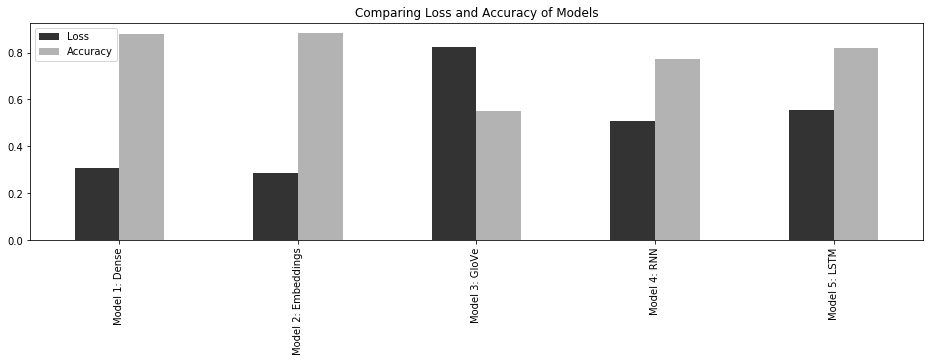

In [79]:
import pandas as pd

df = pd.DataFrame(index = ["Model 1: Dense","Model 2: Embeddings", 
                           "Model 3: GloVe", "Model 4: RNN", 
                           "Model 5: LSTM"],
                  data = {"Loss": [pred1[0],pred2[0],pred3[0],pred4[0],pred5[0]],
                         "Accuracy": [pred1[1],pred2[1],pred3[1],pred4[1],pred5[1]]})

color = ['0.2','0.7']
df.plot(kind = 'bar', color = color, figsize = (16,4), 
        title = "Comparing Loss and Accuracy of Models")

From the plot, it seems like the Dense Net did very well for this task. As Chollet stated in his book, how words followed one another in a movie review does not appear to add information regarding whether the review is positive or negative. More importantly, it's whether positive words or negative words appear in it that determines if the review is positive or negative.  
  
## Improving Dense Net  
    
Let's see if we can improve the Dense Net by tuning its hyper-parameters. 

#### i) Using 3 hidden layers  
Instead of 2 hidden layers, we will add one more layer. 

In [54]:
model6 = Sequential()
model6.add(Dense(16, activation= "relu", input_shape = (10000, )))
model6.add(Dense(16, activation = "relu")) #  added 1 more layer
model6.add(Dense(16, activation = "relu"))
model6.add(Dense(1, activation = "sigmoid"))

model6.compile(optimizer = "rmsprop",
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

history6 = model6.fit(training_input_binary_index, 
                    training_label, 
                    epochs = 10, 
                    batch_size = 512, 
                    validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 84us/step - loss: 0.4810 - acc: 0.7989 - val_loss: 0.3312 - val_acc: 0.8814
Epoch 2/10
20000/20000 [==============================] - 1s 60us/step - loss: 0.2706 - acc: 0.9057 - val_loss: 0.2756 - val_acc: 0.8908
Epoch 3/10
20000/20000 [==============================] - 1s 51us/step - loss: 0.1977 - acc: 0.9307 - val_loss: 0.2933 - val_acc: 0.8840
Epoch 4/10
20000/20000 [==============================] - 1s 61us/step - loss: 0.1596 - acc: 0.9444 - val_loss: 0.3122 - val_acc: 0.8810
Epoch 5/10
20000/20000 [==============================] - 1s 52us/step - loss: 0.1353 - acc: 0.9528 - val_loss: 0.3916 - val_acc: 0.8652
Epoch 6/10
20000/20000 [==============================] - 1s 60us/step - loss: 0.1150 - acc: 0.9600 - val_loss: 0.3665 - val_acc: 0.8788
Epoch 7/10
20000/20000 [==============================] - 1s 51us/step - loss: 0.0928 - acc: 0.9685 - val_loss: 0.3814 - val_acc:

25000/25000 [==============================] - 4s 168us/step
['loss', 'acc'] 
 [0.48547552971124647, 0.86412]


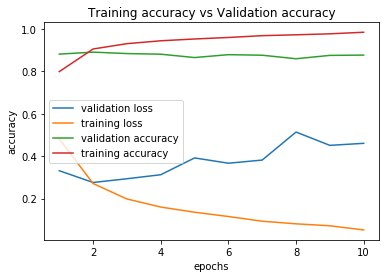

In [55]:
val_loss = history6.history['val_loss']
loss = history6.history['loss']
epochs = range(1, len(val_loss)+1)
plt.plot(epochs, val_loss, label = "validation loss")
plt.plot(epochs, loss, label = 'training loss')
plt.title("Training loss vd Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

val_acc = history6.history["val_acc"]
acc = history6.history["acc"]
plt.plot(epochs, val_acc, label = "validation accuracy")
plt.plot(epochs, acc, label = "training accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Training accuracy vs Validation accuracy")
plt.legend()

pred6 = model6.evaluate(test_input_binary_index, test_label)
print(model6.metrics_names,"\n",pred6)

#### ii) Using more hidden units  
We will use 64 hidden nodes instead of 16.

In [56]:
model7 = Sequential()
model7.add(Dense(64, activation= "relu", input_shape = (10000, )))  # changed to 64 nodes
model7.add(Dense(64, activation = "relu"))  # changed to 64 nodes
model7.add(Dense(1, activation = "sigmoid"))

model7.compile(optimizer = "rmsprop",
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

history7 = model7.fit(training_input_binary_index, 
                    training_label, 
                    epochs = 10, 
                    batch_size = 512, 
                    validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 106us/step - loss: 0.4510 - acc: 0.7869 - val_loss: 0.4093 - val_acc: 0.8276
Epoch 2/10
20000/20000 [==============================] - 2s 82us/step - loss: 0.2483 - acc: 0.9073 - val_loss: 0.2705 - val_acc: 0.8954
Epoch 3/10
20000/20000 [==============================] - 1s 69us/step - loss: 0.1812 - acc: 0.9330 - val_loss: 0.2786 - val_acc: 0.8932
Epoch 4/10
20000/20000 [==============================] - 1s 71us/step - loss: 0.1401 - acc: 0.9476 - val_loss: 0.3032 - val_acc: 0.8910
Epoch 5/10
20000/20000 [==============================] - 1s 71us/step - loss: 0.1088 - acc: 0.9597 - val_loss: 0.3414 - val_acc: 0.8852
Epoch 6/10
20000/20000 [==============================] - 1s 72us/step - loss: 0.0777 - acc: 0.9734 - val_loss: 0.3631 - val_acc: 0.8828
Epoch 7/10
20000/20000 [==============================] - 1s 70us/step - loss: 0.0524 - acc: 0.9833 - val_loss: 0.4314 - val_acc

25000/25000 [==============================] - 6s 242us/step
['loss', 'acc'] 
 [0.5668231477236748, 0.86592]


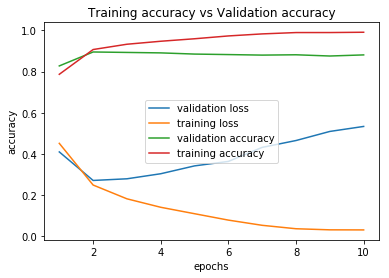

In [57]:
val_loss = history7.history['val_loss']
loss = history7.history['loss']
epochs = range(1, len(val_loss)+1)
plt.plot(epochs, val_loss, label = "validation loss")
plt.plot(epochs, loss, label = 'training loss')
plt.title("Training loss vd Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

val_acc = history7.history["val_acc"]
acc = history7.history["acc"]
plt.plot(epochs, val_acc, label = "validation accuracy")
plt.plot(epochs, acc, label = "training accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Training accuracy vs Validation accuracy")
plt.legend()

pred7 = model7.evaluate(test_input_binary_index, test_label)
print(model7.metrics_names,"\n",pred7)

#### iii) Using MSE as loss function  
Let's try MSE as the loss function rather than binary cross entropy

In [58]:
model8 = Sequential()
model8.add(Dense(16, activation= "relu", input_shape = (10000, )))
model8.add(Dense(16, activation = "relu"))
model8.add(Dense(1, activation = "sigmoid"))

model8.compile(optimizer = "rmsprop",
               loss = 'mse',  # changed to mse
               metrics = ['accuracy'])

history8 = model8.fit(training_input_binary_index, 
                    training_label, 
                    epochs = 4, 
                    batch_size = 512, 
                    validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/4
20000/20000 [==============================] - 2s 80us/step - loss: 0.1568 - acc: 0.8114 - val_loss: 0.1131 - val_acc: 0.8660
Epoch 2/4
20000/20000 [==============================] - 1s 51us/step - loss: 0.0825 - acc: 0.9103 - val_loss: 0.0863 - val_acc: 0.8926
Epoch 3/4
20000/20000 [==============================] - 1s 61us/step - loss: 0.0606 - acc: 0.9319 - val_loss: 0.0816 - val_acc: 0.8962
Epoch 4/4
20000/20000 [==============================] - 1s 48us/step - loss: 0.0488 - acc: 0.9454 - val_loss: 0.0806 - val_acc: 0.8926


25000/25000 [==============================] - 3s 129us/step
['loss', 'acc'] 
 [0.08780018651127815, 0.88132]


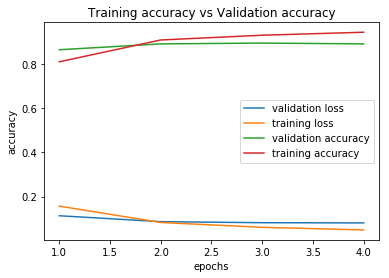

In [59]:
val_loss = history8.history['val_loss']
loss = history8.history['loss']
epochs = range(1, len(val_loss)+1)
plt.plot(epochs, val_loss, label = "validation loss")
plt.plot(epochs, loss, label = 'training loss')
plt.title("Training loss vd Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

val_acc = history8.history["val_acc"]
acc = history8.history["acc"]
plt.plot(epochs, val_acc, label = "validation accuracy")
plt.plot(epochs, acc, label = "training accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Training accuracy vs Validation accuracy")
plt.legend()

pred8 = model8.evaluate(test_input_binary_index, test_label)
print(model8.metrics_names,"\n",pred8)

#### iv) Using a different activation function  
Replace Relu activation function with tanh activation.

In [60]:
model9 = Sequential()
model9.add(Dense(16, activation= "tanh", input_shape = (10000, )))  # changed to tanh
model9.add(Dense(16, activation = "tanh"))  # changed to tanh
model9.add(Dense(1, activation = "sigmoid"))

model9.compile(optimizer = "rmsprop",
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

history9 = model9.fit(training_input_binary_index, 
                    training_label, 
                    epochs = 10, 
                    batch_size = 512, 
                    validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 84us/step - loss: 0.4633 - acc: 0.8235 - val_loss: 0.3641 - val_acc: 0.8602
Epoch 2/10
20000/20000 [==============================] - 1s 50us/step - loss: 0.2603 - acc: 0.9105 - val_loss: 0.2834 - val_acc: 0.8890
Epoch 3/10
20000/20000 [==============================] - 1s 49us/step - loss: 0.1884 - acc: 0.9329 - val_loss: 0.2720 - val_acc: 0.8938
Epoch 4/10
20000/20000 [==============================] - 1s 60us/step - loss: 0.1503 - acc: 0.9471 - val_loss: 0.2879 - val_acc: 0.8918
Epoch 5/10
20000/20000 [==============================] - 1s 48us/step - loss: 0.1245 - acc: 0.9571 - val_loss: 0.3210 - val_acc: 0.8854
Epoch 6/10
20000/20000 [==============================] - 1s 50us/step - loss: 0.1013 - acc: 0.9666 - val_loss: 0.3629 - val_acc: 0.8808
Epoch 7/10
20000/20000 [==============================] - 1s 49us/step - loss: 0.0838 - acc: 0.9740 - val_loss: 0.3820 - val_acc:

25000/25000 [==============================] - 4s 148us/step
['loss', 'acc'] 
 [0.5486943539500236, 0.85472]


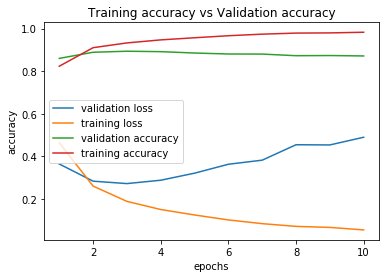

In [61]:
val_loss = history9.history['val_loss']
loss = history9.history['loss']
epochs = range(1, len(val_loss)+1)
plt.plot(epochs, val_loss, label = "validation loss")
plt.plot(epochs, loss, label = 'training loss')
plt.title("Training loss vd Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

val_acc = history9.history["val_acc"]
acc = history9.history["acc"]
plt.plot(epochs, val_acc, label = "validation accuracy")
plt.plot(epochs, acc, label = "training accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Training accuracy vs Validation accuracy")
plt.legend()

pred9 = model9.evaluate(test_input_binary_index, test_label)
print(model9.metrics_names,"\n",pred9)

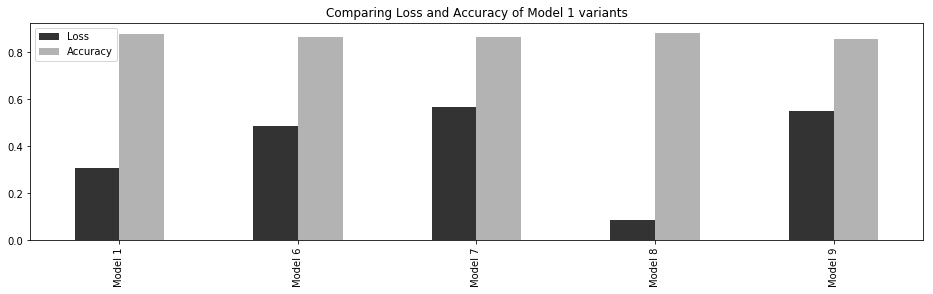

In [80]:
import pandas as pd

df = pd.DataFrame(index = ["Model 1","Model 6", 
                           "Model 7", "Model 8", 
                           "Model 9"],
                  data = {"Loss": [pred1[0],pred6[0],pred7[0],pred8[0],pred9[0]],
                         "Accuracy": [pred1[1],pred6[1],pred7[1],pred8[1],pred9[1]]})

color = ['0.2','0.7']
df.plot(kind = 'bar', color = color, 
        figsize = (16,4), 
        title = "Comparing Loss and Accuracy of Model 1 variants")

We will see that Model 6,7 and 9 have comparable accuracy but higher loss as they overfitted more quickly, when compared to Model 1.   
  
Loss incurred by Model 8 makes for difficult direct comparison, as Model 8 and Model 1 essentially have the same model configuration but are trained towards different objective functions, the former MSE while the latter binary cross-entropy. Both achieved high accuracy. 



## Adding Regularization  
  
  
Let's focus on Model 1 and add regularization to it, so that it can be trained for longer periods without overfitting. We can see that L2 regularization, as used in Model 10, and Dropout, as used in Model 11 allow training to extend for more epochs.

### L2 Regularization

In [63]:
from keras import regularizers

model10 = Sequential()
model10.add(Dense(16, activation= "relu", 
            kernel_regularizer = regularizers.l2(0.005),
            input_shape = (10000, )))
model10.add(Dense(16, activation = "relu",
            kernel_regularizer = regularizers.l2(0.005),))
model10.add(Dense(1, activation = "sigmoid"))
model10.summary()

model10.compile(optimizer = "rmsprop",
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])


history10 = model10.fit(training_input_binary_index, 
                    training_label, 
                    epochs = 30, 
                    batch_size = 512, 
                    validation_split = 0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_31 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/30
20000/20000 [==============================] - 2s 83us/step - loss: 0.6433 - acc: 0.7901 - val_loss: 0.4998 - val_acc: 0.8690
Epoch 2/30
20000/20000 [==============================] - 1s 54us/step - loss: 0.4447 - acc: 0.8895 - val_loss: 0.4424 - val_acc: 0.8764
Epoch 3/30
20000/20000 [==============================] - 1s 57us/step - loss

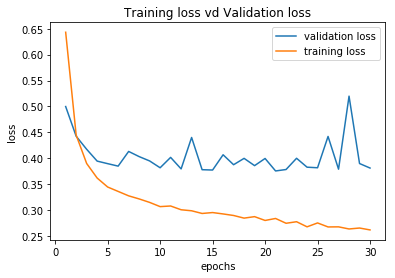

In [64]:
val_loss = history10.history['val_loss']
loss = history10.history['loss']
epochs = range(1, len(val_loss)+1)
plt.plot(epochs, val_loss, label = "validation loss")
plt.plot(epochs, loss, label = 'training loss')
plt.title("Training loss vd Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

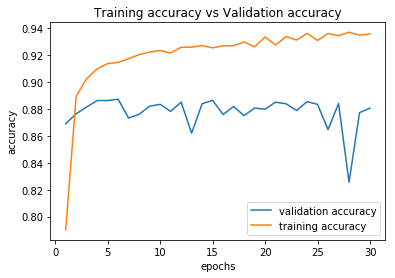

In [65]:
val_acc = history10.history["val_acc"]
acc = history10.history["acc"]
plt.plot(epochs, val_acc, label = "validation accuracy")
plt.plot(epochs, acc, label = "training accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Training accuracy vs Validation accuracy")
plt.legend()

In [66]:
pred10 = model10.evaluate(test_input_binary_index, test_label)
print(model10.metrics_names,"\n",pred10)

25000/25000 [==============================] - 2s 69us/step
['loss', 'acc'] 
 [0.3969616022872925, 0.8768]


### Dropout

In [67]:
from keras.layers import Dropout

model11 = Sequential()
model11.add(Dense(16, activation= "relu", input_shape = (10000, )))
model11.add(Dropout(0.7))
model11.add(Dense(16, activation = "relu"))
model11.add(Dropout(0.7))  
model11.add(Dense(1, activation = "sigmoid"))
model11.summary()


model11.compile(optimizer = "rmsprop",
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])


history11 = model11.fit(training_input_binary_index, 
                    training_label, 
                    epochs = 20, 
                    batch_size = 512, 
                    validation_split = 0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 16)                160016    
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 2s 86us/step - loss: 0.6657 -

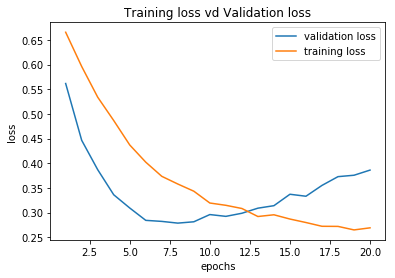

In [68]:
val_loss = history11.history['val_loss']
loss = history11.history['loss']
epochs = range(1, len(val_loss)+1)
plt.plot(epochs, val_loss, label = "validation loss")
plt.plot(epochs, loss, label = 'training loss')
plt.title("Training loss vd Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

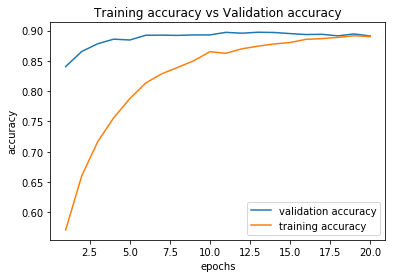

In [69]:
val_acc = history11.history["val_acc"]
acc = history11.history["acc"]
plt.plot(epochs, val_acc, label = "validation accuracy")
plt.plot(epochs, acc, label = "training accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Training accuracy vs Validation accuracy")
plt.legend()

In [70]:
pred11 = model11.evaluate(test_input_binary_index, test_label)
print(model11.metrics_names,"\n",pred11)

25000/25000 [==============================] - 4s 173us/step
['loss', 'acc'] 
 [0.4056386887574196, 0.87776]


Reference:

1) Deep Learning with Python - Francois Chollet